In [1]:
DATA_PATH = r'/home/luis-felipe/Uncertainty_Estimation/data'
#CORRUPTED_DATA_PATH = os.path.join(DATA_PATH,'corrupted')

PATH_MODELS = r'/home/luis-felipe/Uncertainty_Estimation/torch_models'
PATH_trainer = r'/home/luis-felipe/Uncertainty_Estimation/torch_models/trainer'

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from torch import nn
from collections import defaultdict
import copy

In [3]:
import NN_models as models
import NN_utils as utils
import NN_utils.train_and_eval as TE
import cifar_data

In [4]:
datasets = ['Cifar10']
models_list = ['ResNet50']#,'ResNet18','ResNet34','ResNet101']
for MODEL_ARC in models_list:
    for DATA in datasets:
        for DP_RATE in [0]:
            name = MODEL_ARC+'_'+DATA+'_Dropout' if DP_RATE else MODEL_ARC+'_'+DATA
            data = cifar_data.__dict__[DATA](data_dir = DATA_PATH)
            model_class = models.__dict__[MODEL_ARC]

            model = model_class(num_classes = data.n_classes,softmax = 'log',name = name,drop_rate = DP_RATE)
            

Files already downloaded and verified
Files already downloaded and verified


In [5]:
model.eval()
for m in model.modules():
    if m.__class__.__name__.startswith('BatchNorm'):
        #m.train()
        #m.track_running_stats = True
        #m.momentum = 1
        m0 = m

In [6]:
data = cifar_data.Cifar10(data_dir = DATA_PATH)
im_train,_ = data.get_sample(data = 'train')
im_test,_ = data.get_sample(data = 'test')

Files already downloaded and verified
Files already downloaded and verified


In [7]:
m0.track_running_stats

True

In [8]:
mom = m0.running_mean

In [9]:
mom

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [20]:
np.argmin([1,0,3,4])

1

In [ ]:
#model.eval()

im_train,_ = data.get_sample(data = 'train')
#print(torch.mean(im_train))
with torch.no_grad():
    model(im_train)

    model.eval()
    print(model(im_test))

In [ ]:
im_train,_ = data.get_sample(data = 'train')
        
model(im_train)
model.eval()
m0.running_mean

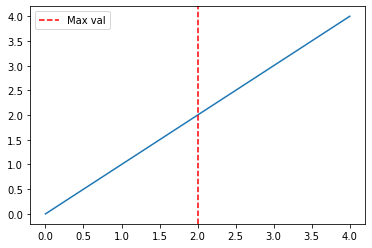

In [18]:
plt.plot(range(5))
plt.axvline(2,linestyle = '--', color = 'r', label = 'Max val')
plt.legend()

In [22]:
a = nn.NLLLoss()

In [25]:
a.__class__.name

AttributeError: type object 'NLLLoss' has no attribute 'name'

In [26]:
str(a)

'NLLLoss()'

In [27]:
type(a).__name__

'NLLLoss'